In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/ecommerce.csv'

try:
    df = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


### Initial Data Assessment

In [4]:
df.head()

,SeqID,OrderID,Data_Ordered,Date_Shipped,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeqID          9994 non-null   int64  
 1   OrderID        9994 non-null   object 
 2   Data_Ordered   9994 non-null   object 
 3   Date_Shipped   9981 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9942 non-null   float64
 18  Quantity

In [6]:
# Display column statistics
df.describe()

,SeqID,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9942.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.228372,3.774765,0.156203
std,2885.163629,32063.693350,623.414782,2.250143,0.206452
min,1.000000,1040.000000,0.444000,-9.000000,0.000000
25%,2499.250000,23223.000000,17.256000,2.000000,0.000000
50%,4997.500000,56430.500000,54.384000,3.000000,0.200000
75%,7495.750000,90008.000000,209.769000,5.000000,0.200000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000


In [7]:
# Check for the number of unique values in each column
df.nunique()

SeqID            9994
OrderID          5009
Data_Ordered     1240
Date_Shipped     1338
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5804
Quantity           22
Discount           12
Profit           7285
dtype: int64

## Data Overview

**Total Records:** 9,994 entries

### Attributes:

- **SeqID:** A sequence identifier.
- **OrderID:** Unique identifier for each order.
- **Date Ordered:** Date when the order was placed.
- **Date Shipped:** Date when the order was shipped.
- **Ship Mode:** Shipping mode (e.g., Second Class, Standard Class).
- **Customer ID:** Unique identifier for each customer.
- **Customer Name:** Name of the customer.
- **Segment:** Customer segment (e.g., Consumer, Corporate).
- **Country, City, State, Postal Code, Region:** Geographic information.
- **Product ID:** Unique identifier for each product.
- **Category:** Product category (e.g., Furniture, Office Supplies).
- **Sub-Category:** Subcategory of the product (e.g., Bookcases, Chairs).
- **Product Name:** Name of the product.
- **Sales:** Sales amount.
- **Quantity:** Quantity of items per order.
- **Discount:** Discount applied to the order.
- **Profit:** Profit from the order.


### Step 1: Remove unnecessary columns

### Considerations

#### 1. SeqID
- **Reason for Removal:** If SeqID is merely a sequential identifier that adds no value beyond what OrderID already provides (unique identification of orders), it's redundant and can be removed.
- **Decision Basis:** It does not influence analysis outcomes and is not necessary for relational joins or historical tracking.

#### 2. Customer Name
- **Reason for Removal:** In many analytical contexts, especially those sensitive to data privacy, detailed personally identifiable information (PII) such as Customer Name might be unnecessary. As personalized marketing isn't part of the analysis, we could drop this to comply with privacy standards.
- **Decision Basis:** Reducing privacy risks and focusing on non-PII for customer analysis.

#### 3. Postal Code
- **Reason for Removal:** Depending on the granularity of the geographic analysis, Postal Code might be too detailed, particularly as we already have City and Region which provide sufficient geographical segmentation.
- **Decision Basis:** Simplifying the geographic analysis without significantly impacting the ability to perform meaningful regional market analysis.

####  4. Product Name
- **Reason for Removal:** Product ID and Category/Sub-Category adequately describe the product for our analysis needs.
- **Decision Basis:** It does not influence analysis outcomes.

In [8]:
def drop_columns(df, columns_to_drop):

    # Check if all columns to drop are in the DataFrame
    missing_cols = [col for col in columns_to_drop if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns not found in DataFrame: {', '.join(missing_cols)}")

    # Drop the columns and return the new DataFrame
    return df.drop(columns=columns_to_drop)

In [9]:
# Columns to be removed
columns_to_drop = ['SeqID', 'Customer Name', 'Postal Code', 'Product Name']

In [10]:
df = drop_columns(df, columns_to_drop)

In [11]:
df.columns

Index(['OrderID', 'Data_Ordered', 'Date_Shipped', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Step 2: Handling column name inconsistencies

In [12]:
# To ensure consistency and ease of use, standardize the column names of the dataframe. 
def clean_column_names(raw_data):
    
    # Input validation
    if not isinstance(raw_data, pd.DataFrame):
        raise ValueError("Input 'raw_data' is not a valid DataFrame.")

    # Create a defensive copy of the DataFrame
    cleaned_data = raw_data.copy()
    
    # Clean column names
    cleaned_data.columns = cleaned_data.columns.str.strip().str.replace(' ', '_').str.lower().str.replace('[^\w]', '', regex=True)
    
    return cleaned_data

In [13]:
df = clean_column_names(df)
df.columns

Index(['orderid', 'data_ordered', 'date_shipped', 'ship_mode', 'customer_id',
       'segment', 'country', 'city', 'state', 'region', 'product_id',
       'category', 'subcategory', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [14]:
# Renames the column names of the given date frame with according to the specified column_names dictionary
# Example column_names={'st': 'state'}

def rename_column_names(raw_data, column_names):
    if not isinstance(raw_data, pd.DataFrame) or raw_data.empty:
        raise ValueError("Input 'raw_data' must be a non-empty DataFrame.")
    
    if not isinstance(column_names, dict):
        raise ValueError("Input 'column_names' must be a dictionary.")
    
    existing_columns = set(raw_data.columns)
    
    new_columns = set(column_names.values())
    
    if not new_columns.isdisjoint(existing_columns):
        raise ValueError("New column names should not overlap with existing column names.")
    
    for key in column_names:
        if key not in existing_columns:
            raise ValueError(f"Column '{key}' does not exist in the DataFrame.")
    
    raw_data = raw_data.rename(columns=column_names)
    return raw_data

In [15]:
df = rename_column_names(df,{
    'data_ordered': 'date_ordered',
    'orderid': 'order_id'
})
df.columns

Index(['order_id', 'date_ordered', 'date_shipped', 'ship_mode', 'customer_id',
       'segment', 'country', 'city', 'state', 'region', 'product_id',
       'category', 'subcategory', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### Step 3: Removing duplicates (if any)

Eliminating any duplicate rows to ensure the integrity of the dataset.

In [16]:
df.duplicated().sum()

1

In [17]:
df[df.duplicated()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,281.372,2,0.3,-12.0588


In [18]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)

duplicate_rows

1

### Step 4: Handling raws with missing values

In [19]:
# Check for missing values
print(df.isnull().sum())

order_id         0
date_ordered     0
date_shipped    13
ship_mode        0
customer_id      0
segment          0
country          0
city             0
state            0
region           0
product_id       0
category         0
subcategory      0
sales           52
quantity         0
discount         0
profit           0
dtype: int64


In [20]:
df[df['sales'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
533,CA-2016-168753,5/29/2016,6/1/2016,Second Class,RL-19615,Consumer,United States,Montgomery,Alabama,South,TEC-PH-10000984,Technology,Phones,NaN,5,0.0,274.386
534,CA-2016-168753,5/29/2016,6/1/2016,Second Class,RL-19615,Consumer,United States,Montgomery,Alabama,South,OFF-BI-10002557,Office Supplies,Binders,NaN,5,0.0,11.375
1269,CA-2017-100426,6/4/2017,6/8/2017,Standard Class,DC-12850,Consumer,United States,Florence,Alabama,South,OFF-PA-10002870,Office Supplies,Paper,NaN,2,0.0,5.616
1431,CA-2014-120768,12/19/2014,12/21/2014,Second Class,IM-15070,Consumer,United States,Florence,Alabama,South,OFF-BI-10001191,Office Supplies,Binders,NaN,6,0.0,74.8524
1432,CA-2014-120768,12/19/2014,12/21/2014,Second Class,IM-15070,Consumer,United States,Florence,Alabama,South,OFF-SU-10004115,Office Supplies,Supplies,NaN,1,0.0,1.9629
1433,CA-2014-120768,12/19/2014,12/21/2014,Second Class,IM-15070,Consumer,United States,Florence,Alabama,South,FUR-CH-10000513,Furniture,Chairs,NaN,14,0.0,163.7874
1451,CA-2016-133711,11/26/2016,11/29/2016,First Class,MC-17425,Corporate,United States,Mobile,Alabama,South,OFF-PA-10001685,Office Supplies,Paper,NaN,7,0.0,34.7802
1452,CA-2016-133711,11/26/2016,11/29/2016,First Class,MC-17425,Corporate,United States,Mobile,Alabama,South,OFF-BI-10000666,Office Supplies,Binders,NaN,3,0.0,45.84
1453,CA-2016-133711,11/26/2016,11/29/2016,First Class,MC-17425,Corporate,United States,Mobile,Alabama,South,OFF-BI-10004352,Office Supplies,Binders,NaN,5,0.0,16.875
1454,CA-2016-133711,11/26/2016,11/29/2016,First Class,MC-17425,Corporate,United States,Mobile,Alabama,South,TEC-MA-10000010,Technology,Machines,NaN,8,0.0,1459.2


Missing `Sales` data might be problematic because it directly affects revenue and profitability analyses. The absence could be due to data entry errors or transactions not being completed at the time of data extraction.

As the percentage of missing Sales data is small, imputation might be a viable option, especially considering that other metrics (like quantities and product types) are intact and typical transaction values can be reasonably estimated. If detailed analyses of sales figures are essential: It might be safer to remove these entries to avoid skewing results with imputed values that could be significantly off-mark.

Considering the following options: 

- Option 1: Impute missing sales 
- Option 2: Remove these records as they are a small fraction of the dataset

In [21]:
df[df['date_shipped'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
68,CA-2014-106376,12/5/2014,NaN,Standard Class,BS-11590,Corporate,United States,Gilbert,Arizona,West,TEC-PH-10002726,Technology,Phones,167.968,4,0.2,62.988
126,US-2017-107272,11/5/2017,NaN,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-BI-10003274,Office Supplies,Binders,2.388,2,0.7,-1.8308
127,US-2017-107272,11/5/2017,NaN,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-ST-10002974,Office Supplies,Storage,243.992,7,0.2,30.499
151,CA-2016-158834,3/13/2016,NaN,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,OFF-AP-10000326,Office Supplies,Appliances,157.920,5,0.2,17.766
152,CA-2016-158834,3/13/2016,NaN,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,TEC-PH-10001254,Technology,Phones,203.184,2,0.2,15.2388
372,US-2014-119137,7/23/2014,NaN,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-BI-10001982,Office Supplies,Binders,8.160,5,0.7,-5.712
373,US-2014-119137,7/23/2014,NaN,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10003911,Technology,Accessories,1023.936,8,0.2,179.1888
374,US-2014-119137,7/23/2014,NaN,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-AR-10000658,Office Supplies,Art,9.240,1,0.2,0.924
375,US-2014-119137,7/23/2014,NaN,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10002076,Technology,Accessories,479.040,10,0.2,-29.94
462,CA-2016-109869,4/22/2016,NaN,Standard Class,TN-21040,Home Office,United States,Phoenix,Arizona,West,FUR-FU-10000023,Furniture,Furnishings,23.560,5,0.2,7.068


In [22]:
# Convert Date_Ordered and Date_Shipped to datetime
df['date_ordered'] = pd.to_datetime(df['date_ordered'])
df['date_shipped'] = pd.to_datetime(df['date_shipped'], errors='coerce')  # Coerce errors in case of bad formatting

# Display the range of dates in Date_Ordered and Date_Shipped
print("Date Ordered range: ", df['date_ordered'].min(), "to", df['date_ordered'].max())
print("Date Shipped range: ", df['date_shipped'].min(), "to", df['date_shipped'].max())


Date Ordered range:  1914-09-20 00:00:00 to 2017-12-30 00:00:00
Date Shipped range:  2014-01-07 00:00:00 to 2034-09-19 00:00:00


**Decision: Considering time limitations, decided to drop rows with null values in either the 'Sales' or 'Date Shipped' columns. This approach allows to focus on analyzing complete data while acknowledging that missing values may impact the accuracy of the analysis. We may revisit this decision in the future to explore predictive methods for filling in missing values.** 

### Order ID

In [23]:
df['order_id'].nunique()

5009

In [24]:
df['order_id'].value_counts().head(10)

order_id
CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
CA-2015-131338    10
US-2015-126977    10
CA-2015-158421     9
US-2016-114013     9
US-2015-163433     9
Name: count, dtype: int64

**Unique Order IDs**: There are 5,009 unique order IDs, suggesting that some orders consist of multiple line items (entries) in the dataset.

**Top 10 Most Frequent Order IDs**: The most frequent order ID appears 14 times, indicating multiple products or transactions are grouped under a single order ID.

This pattern is typical for sales data, where an order can contain multiple products. Each row represents a specific product or transaction within an order, not necessarily a unique order.

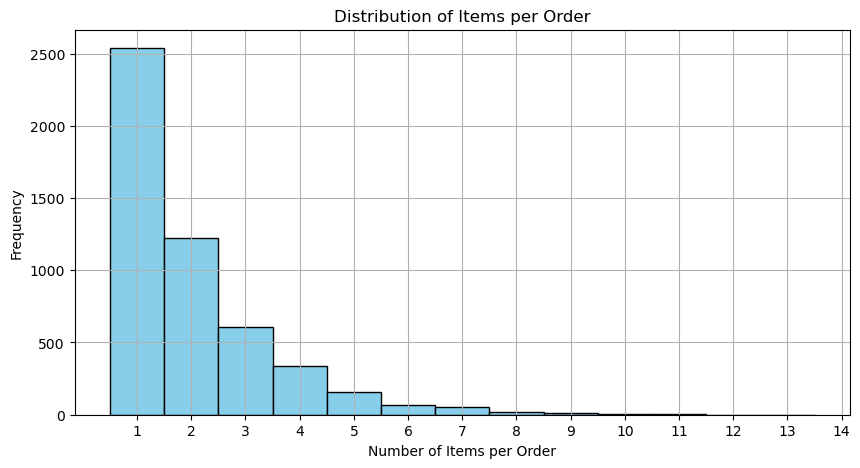

count    5009.000000
mean        1.995009
std         1.410458
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: count, dtype: float64

In [25]:
# Count the frequency of each OrderID
order_item_counts = df['order_id'].value_counts()

# Plot the distribution of items per order
plt.figure(figsize=(10, 5))
plt.hist(order_item_counts, bins=range(1, order_item_counts.max()+1), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.xticks(range(1, order_item_counts.max()+1))
plt.grid(True)
plt.show()

order_item_counts.describe()

The distribution of items per order shows the following:

- Mean: Approximately 2 items per order.
- Median: 1 item per order, indicating that most orders consist of a single item.
- Maximum: Some orders contain up to 14 items.

From the histogram, it's evident that a significant number of orders contain just one item, but there are also quite a few orders with multiple items, showing variability in order composition.


In [26]:
# Filter the data to include only orders with more than one item
#multiple_item_orders = df[df['order_id'].isin(order_item_counts[order_item_counts > 1].index)]

# Explore the top categories and sub-categories that appear in multiple item orders
#category_counts = multiple_item_orders['category'].value_counts()
#sub_category_counts = multiple_item_orders['subcategory'].value_counts()


In [27]:
#category_counts

In [28]:
#sub_category_counts

In [29]:
# Calculate the total sales and quantities for each OrderID in multiple item orders
#order_sales_quantities = multiple_item_orders.groupby('order_id').agg({'sales': 'sum', 'quantity': 'sum'})

# Summary statistics for total sales and quantities per order
#sales_quantities_stats = {
#    "Total Sales Statistics": order_sales_quantities['sales'].describe(),
#    "Total Quantity Statistics": order_sales_quantities['quantity'].describe()
#}

#sales_quantities_stats


### Date Ordered

In [30]:
df['date_ordered'].dtype

dtype('<M8[ns]')

In [31]:
df['date_ordered'].head()

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: date_ordered, dtype: datetime64[ns]

In [32]:
df['date_ordered'].min(), df['date_ordered'].max()

(Timestamp('1914-09-20 00:00:00'), Timestamp('2017-12-30 00:00:00'))

There are no missing values in the date_ordered column, and the data covers a date range from September 20, 1914, to December 30, 2017. The presence of a very early date, like 1914, could be an anomaly or data entry error, considering the context of an e-commerce dataset.

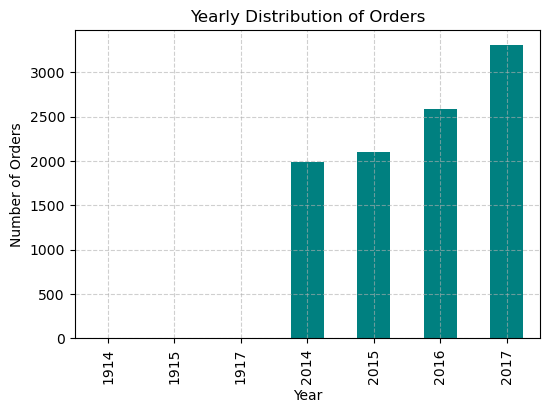

date_ordered
1914       1
1915       1
1917       1
2014    1991
2015    2101
2016    2587
2017    3311
Name: count, dtype: int64

In [33]:
# Extract year from 'date_ordered' and count the number of orders per year
orders_per_year = df['date_ordered'].dt.year.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(6, 4))
orders_per_year.plot(kind='bar', color='teal')
plt.title('Yearly Distribution of Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_year

The yearly distribution of orders reveals that the data primarily spans from 2014 to 2017, with a significant increase in the number of orders each year. The dates from 1914, 1915, and 1917 likely represent data errors since they each have only one order and don't fit the context of a modern e-commerce dataset.

In [34]:
df[df['date_ordered'].dt.year.isin([1914, 1915, 1917])]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
794,CA-2014-156433,1914-09-20,2014-09-26,Standard Class,ES-14020,Consumer,United States,San Francisco,California,West,OFF-PA-10003724,Office Supplies,Paper,21.72,4,0.0,10.6428
969,CA-2017-135279,1917-04-09,2017-04-11,First Class,BS-11800,Home Office,United States,New York City,New York,East,OFF-ST-10001097,Office Supplies,Storage,501.81,3,0.0,0
1294,CA-2015-101707,1915-08-27,2015-09-01,Standard Class,PF-19165,Consumer,United States,San Diego,California,West,OFF-LA-10000134,Office Supplies,Labels,3.08,1,0.0,1.4784


To address the date anomalies for the years 1914, 1915, and 1917 in the `date_ordered` column, we'll assume these are typographical errors where "19" should have been "20". Specifically:

- 1914 should be corrected to 2014
- 1915 should be corrected to 2015
- 1917 should be corrected to 2017


In [35]:
# Correct the years in the 'Data_Ordered' column
df.loc[df['date_ordered'].dt.year == 1914, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)
df.loc[df['date_ordered'].dt.year == 1915, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)
df.loc[df['date_ordered'].dt.year == 1917, 'date_ordered'] = df['date_ordered'] + pd.DateOffset(years=100)

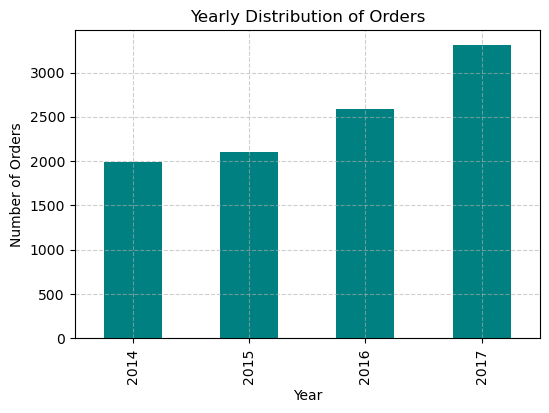

date_ordered
2014    1992
2015    2102
2016    2587
2017    3312
Name: count, dtype: int64

In [36]:
# Extract year from 'date_ordered' and count the number of orders per year
orders_per_year = df['date_ordered'].dt.year.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(6, 4))
orders_per_year.plot(kind='bar', color='teal')
plt.title('Yearly Distribution of Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_year

The date errors have been corrected for the entries that were originally from 1914, 1915, and 1917. The corrected dates now reflect the intended years of 2014, 2015, and 2017, respectively. Here are the corrected rows from the dataset:

- The entries previously dated 1917 are now correctly dated 2017.
- The entries previously dated 1915 are now correctly dated 2015.

These corrections ensure the accuracy of the dataset for any further time-series analysis or reporting.


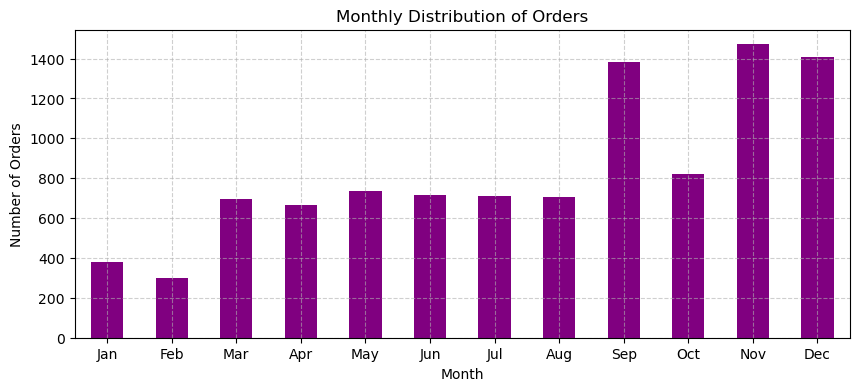

date_ordered
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

In [37]:
# Extract month from 'date_ordered' and count the number of orders per month
orders_per_month = df['date_ordered'].dt.month.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(10, 4))
orders_per_month.plot(kind='bar', color='purple')
plt.title('Monthly Distribution of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_month

The monthly distribution of orders shows a clear pattern:

- There's a gradual increase in order volume starting from January, with noticeable spikes in September, November, and December. These months likely correspond to high shopping seasons due to back-to-school sales, Black Friday, and holiday shopping respectively.
- The lowest order volumes appear in February, which could be due to fewer days in the month and the post-holiday slowdown.

This seasonal trend is typical in retail and e-commerce, reflecting consumer buying habits that align with various events and holidays throughout the year.


### Date Shipped

In [38]:
df['date_shipped'].dtype

dtype('<M8[ns]')

In [39]:
df['date_shipped'].head()

0   2016-11-11
1   2016-11-11
2   2016-06-16
3   2015-10-18
4   2015-10-18
Name: date_shipped, dtype: datetime64[ns]

In [40]:
df['date_shipped'].min(), df['date_shipped'].max()

(Timestamp('2014-01-07 00:00:00'), Timestamp('2034-09-19 00:00:00'))

In [41]:
df['date_shipped'].isnull().sum()

16

In [42]:
df[df['date_shipped'].isnull()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
68,CA-2014-106376,2014-12-05,NaT,Standard Class,BS-11590,Corporate,United States,Gilbert,Arizona,West,TEC-PH-10002726,Technology,Phones,167.968,4,0.2,62.988
126,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-BI-10003274,Office Supplies,Binders,2.388,2,0.7,-1.8308
127,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-ST-10002974,Office Supplies,Storage,243.992,7,0.2,30.499
151,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,OFF-AP-10000326,Office Supplies,Appliances,157.920,5,0.2,17.766
152,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,TEC-PH-10001254,Technology,Phones,203.184,2,0.2,15.2388
372,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-BI-10001982,Office Supplies,Binders,8.160,5,0.7,-5.712
373,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10003911,Technology,Accessories,1023.936,8,0.2,179.1888
374,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-AR-10000658,Office Supplies,Art,9.240,1,0.2,0.924
375,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10002076,Technology,Accessories,479.040,10,0.2,-29.94
462,CA-2016-109869,2016-04-22,NaT,Standard Class,TN-21040,Home Office,United States,Phoenix,Arizona,West,FUR-FU-10000023,Furniture,Furnishings,23.560,5,0.2,7.068


In [43]:
# Summary of shipment data by year
shipments_per_year = df['date_shipped'].dt.year.value_counts().sort_index()
shipments_per_year

date_shipped
2014.0    1933
2015.0    2130
2016.0    2571
2017.0    3298
2018.0      42
2027.0       2
2034.0       1
Name: count, dtype: int64

In [44]:
df[df['date_shipped'].dt.year.isin([2027,2034])]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
410,CA-2017-117457,2017-12-08,2027-12-12,Standard Class,KH-16510,Consumer,United States,San Francisco,California,West,OFF-LA-10003766,Office Supplies,Labels,28.350,9,0.0,13.608
492,CA-2014-113362,2014-09-14,2034-09-19,Standard Class,AJ-10960,Consumer,United States,Rochester,New York,East,OFF-EN-10003845,Office Supplies,Envelopes,11.070,3,0.0,5.0922
671,US-2017-106663,2017-06-09,2027-06-13,Standard Class,MO-17800,Home Office,United States,Chicago,Illinois,Central,OFF-PA-10002377,Office Supplies,Paper,36.352,8,0.2,11.36


In [45]:
# Correct the erroneous years in the 'Date_Shipped' column
df.loc[df['date_shipped'].dt.year == 2027, 'date_shipped'] = df['date_shipped'] - pd.DateOffset(years=10)
df.loc[df['date_shipped'].dt.year == 2034, 'date_shipped'] = df['date_shipped'] - pd.DateOffset(years=20)
shipments_per_year = df['date_shipped'].dt.year.value_counts().sort_index()

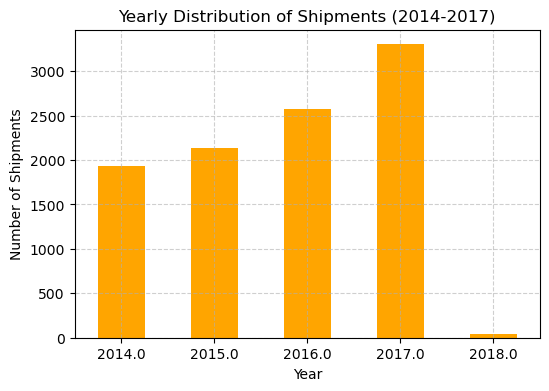

In [46]:
# Plotting the corrected yearly distribution of shipments
plt.figure(figsize=(6, 4))
shipments_per_year.plot(kind='bar', color='orange')
plt.title('Yearly Distribution of Shipments (2014-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


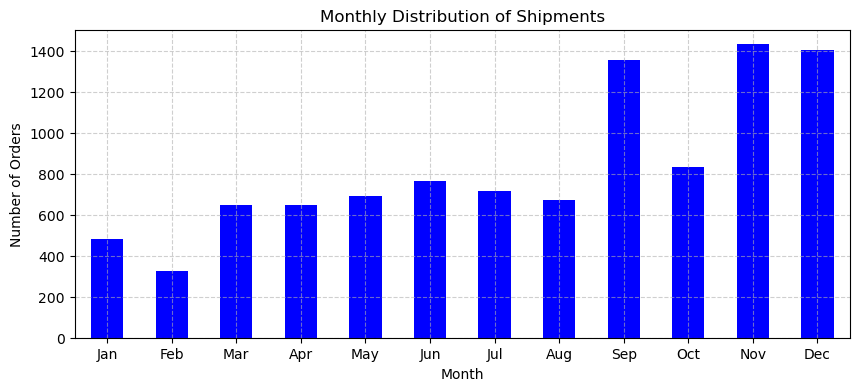

date_ordered
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

In [47]:
# Extract month from 'date_shipped' and count the number of orders per month
orders_shipped_per_month = df['date_shipped'].dt.month.value_counts().sort_index()

# Plotting the yearly distribution of orders
plt.figure(figsize=(10, 4))
orders_shipped_per_month.plot(kind='bar', color='blue')
plt.title('Monthly Distribution of Shipments')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

orders_per_month

In [48]:
df[df['date_shipped'].isna()]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,country,city,state,region,product_id,category,subcategory,sales,quantity,discount,profit
68,CA-2014-106376,2014-12-05,NaT,Standard Class,BS-11590,Corporate,United States,Gilbert,Arizona,West,TEC-PH-10002726,Technology,Phones,167.968,4,0.2,62.988
126,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-BI-10003274,Office Supplies,Binders,2.388,2,0.7,-1.8308
127,US-2017-107272,2017-11-05,NaT,Standard Class,TS-21610,Consumer,United States,Phoenix,Arizona,West,OFF-ST-10002974,Office Supplies,Storage,243.992,7,0.2,30.499
151,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,OFF-AP-10000326,Office Supplies,Appliances,157.920,5,0.2,17.766
152,CA-2016-158834,2016-03-13,NaT,First Class,TW-21025,Home Office,United States,Scottsdale,Arizona,West,TEC-PH-10001254,Technology,Phones,203.184,2,0.2,15.2388
372,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-BI-10001982,Office Supplies,Binders,8.160,5,0.7,-5.712
373,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10003911,Technology,Accessories,1023.936,8,0.2,179.1888
374,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,OFF-AR-10000658,Office Supplies,Art,9.240,1,0.2,0.924
375,US-2014-119137,2014-07-23,NaT,Standard Class,AG-10900,Consumer,United States,Tucson,Arizona,West,TEC-AC-10002076,Technology,Accessories,479.040,10,0.2,-29.94
462,CA-2016-109869,2016-04-22,NaT,Standard Class,TN-21040,Home Office,United States,Phoenix,Arizona,West,FUR-FU-10000023,Furniture,Furnishings,23.560,5,0.2,7.068


In [49]:
# Calculate the processing time in days
df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# Display basic statistics and the first few entries of processing times
processing_time_stats = df['processing_time'].describe()
processing_time_samples = df['processing_time'].head()

processing_time_stats, processing_time_samples


(count    9977.000000
 mean        3.957001
 std         1.746820
 min         0.000000
 25%         3.000000
 50%         4.000000
 75%         5.000000
 max         7.000000
 Name: processing_time, dtype: float64,
 0    3.0
 1    3.0
 2    4.0
 3    7.0
 4    7.0
 Name: processing_time, dtype: float64)

The processing time, representing the number of days from when an order was placed to when it was shipped, has the following characteristics:

- Mean Processing Time: Approximately 3.96 days
- Standard Deviation: 1.75 days, indicating some variability but mostly consistent processing times
- Minimum Processing Time: 0 days (same-day shipping)
- Median Processing Time: 4 days
- Maximum Processing Time: 7 days

Most orders are processed within a week, with a median of 4 days. This suggests a relatively quick turnaround for shipping orders.

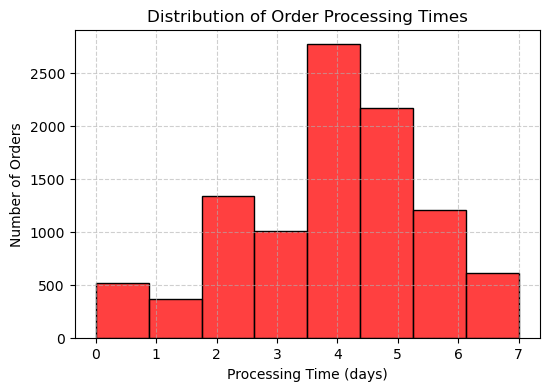

In [50]:
# Plotting the distribution of processing times
plt.figure(figsize=(6, 4))
sns.histplot(df['processing_time'], bins=8, kde=False, color='red')
plt.title('Distribution of Order Processing Times')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The histogram of order processing times illustrates that the majority of orders are shipped within 3 to 5 days from the order date. There is a notable amount of orders processed in exactly 4 days, which is consistent with the median processing time. Additionally, there are some instances of same-day shipping, represented by the 0-day processing time, though these are less common.

This visualization helps us understand that the processing time for orders is relatively consistent, with most orders being shipped within a week, aligning with efficient logistics operations.

In [51]:
# df['date_ordered'] = pd.to_datetime(df['date_ordered'])
# df['date_shipped'] = pd.to_datetime(df['date_shipped'])

# # Calculate the median processing time
# median_processing_time = df['processing_time'].median()

# # Combined update of 'Date_Shipped' and recalculating 'Processing_Time'
# df['date_shipped'] = df['date_shipped'].fillna(
#     df['date_ordered'] + pd.DateOffset(days=median_processing_time)
# )
# df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# # Verify the combined updates by showing the basic statistics of 'Date_Shipped' and 'Processing_Time'
# final_date_shipped_check = df['date_shipped'].isnull().sum()
# final_processing_time_stats = df['processing_time'].describe()

# median_processing_time, final_date_shipped_check, final_processing_time_stats


### Ship Mode

In [52]:
# Count the frequency of each Ship Mode
ship_mode_counts = df['ship_mode'].value_counts()
ship_mode_counts

ship_mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [53]:
# Display the percentages of each ship mode
ship_mode_percentages = df['ship_mode'].value_counts(normalize=True) * 100
ship_mode_percentages

ship_mode
Standard Class    59.711798
Second Class      19.463625
First Class       15.390774
Same Day           5.433804
Name: proportion, dtype: float64

The Ship Mode column has the following categories and distribution:

- Standard Class: 5,968 shipments (59.72%)
- Second Class: 1,945 shipments (19.46%)
- First Class: 1,538 shipments (15.39%)
- Same Day: 543 shipments (5.43%)

These statistics show that the majority of shipments are sent via Standard Class, which likely represents the default or most economical shipping option. First Class and Second Class are also significantly used, whereas Same Day shipping, the fastest and potentially most expensive option, is the least common.


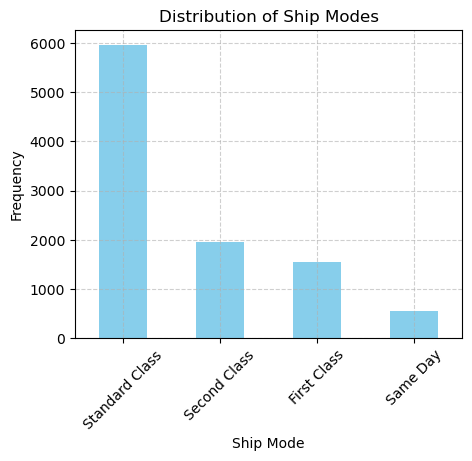

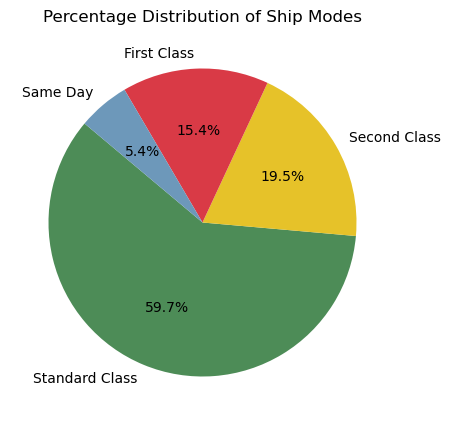

In [54]:
# Creating a bar chart for Ship Mode distribution
plt.figure(figsize=(5, 4))
ship_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Creating a pie chart for Ship Mode distribution
plt.figure(figsize=(5, 5))
plt.pie(ship_mode_percentages, labels=ship_mode_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#4D8C57', '#E6C229', '#D93A46', '#6D98BA'])
plt.title('Percentage Distribution of Ship Modes')
plt.show()


Here are the visual representations of the Ship Mode distribution within the dataset:

- **Bar Chart:** Highlights the frequency of each shipping mode, clearly showing that Standard Class is the most common, followed by Second Class, First Class, and Same Day.

- **Pie Chart:** Provides a percentage breakdown, giving a quick visual indication of the proportion each shipping mode occupies. Standard Class dominates, making up nearly 60% of all shipments.

These visualizations underscore the preference for Standard Class shipping, likely due to cost-efficiency, while faster shipping options like Same Day are less frequently used.

This analysis helps understand customer shipping preferences or operational logistics decisions.


To analyze the unique processing times for each Ship Mode, we can explore the range of processing times associated with each shipping option. This will provide insights into the variability and efficiency of each mode.

In [55]:
# Grouping the data by 'Ship Mode' and collecting unique processing times for each mode
unique_processing_times_per_ship_mode = df.dropna().groupby('ship_mode')['processing_time'].unique()

# Display the unique processing times for each shipping mode
unique_processing_times_per_ship_mode


ship_mode
First Class            [2.0, 1.0, 3.0, 4.0]
Same Day                         [0.0, 1.0]
Second Class      [3.0, 4.0, 2.0, 5.0, 1.0]
Standard Class    [7.0, 5.0, 4.0, 6.0, 3.0]
Name: processing_time, dtype: object

Here are the unique processing times for each shipping mode:

- **First Class:** Processing times include 1, 2, 3, and 4 days. This indicates a relatively quick processing time, aligning with the "First Class" service.

- **Same Day:** Processing times are 0, 1, and 4 days. The inclusion of a 0-day processing time highlights the immediacy of this shipping mode.

- **Second Class:** Processing times range from 1 to 5 days, showcasing a moderate speed that fits between First Class and Standard Class.

- **Standard Class:** Processing times span 3 to 7 days, indicating the longest durations, which is consistent with this being a less expensive and slower shipping option.

These results show a clear differentiation in service levels, with faster options (like First Class and Same Day) having shorter processing times, and more economical options (like Standard Class) taking longer. This information can be useful for understanding the operational efficiencies and customer service standards associated with each shipping mode.


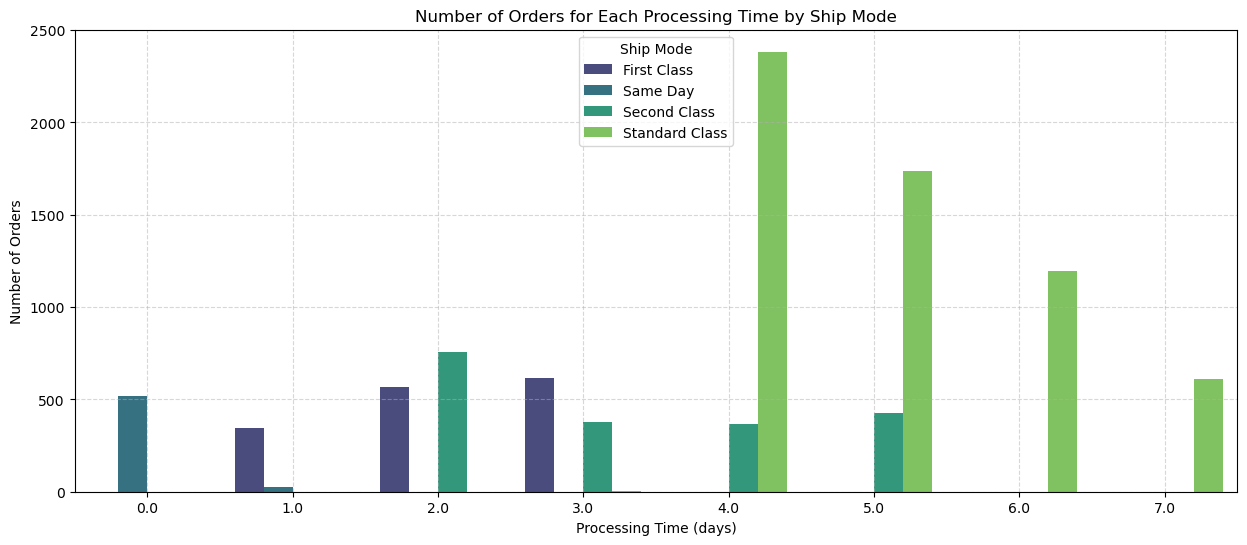

In [56]:
# Creating a DataFrame for visualization
processing_time_counts = df.dropna().groupby(['ship_mode', 'processing_time']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(15, 6))
sns.barplot(x='processing_time', y='Count', hue='ship_mode', data=processing_time_counts, palette='viridis')
plt.title('Number of Orders for Each Processing Time by Ship Mode')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Orders')
plt.legend(title='Ship Mode')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

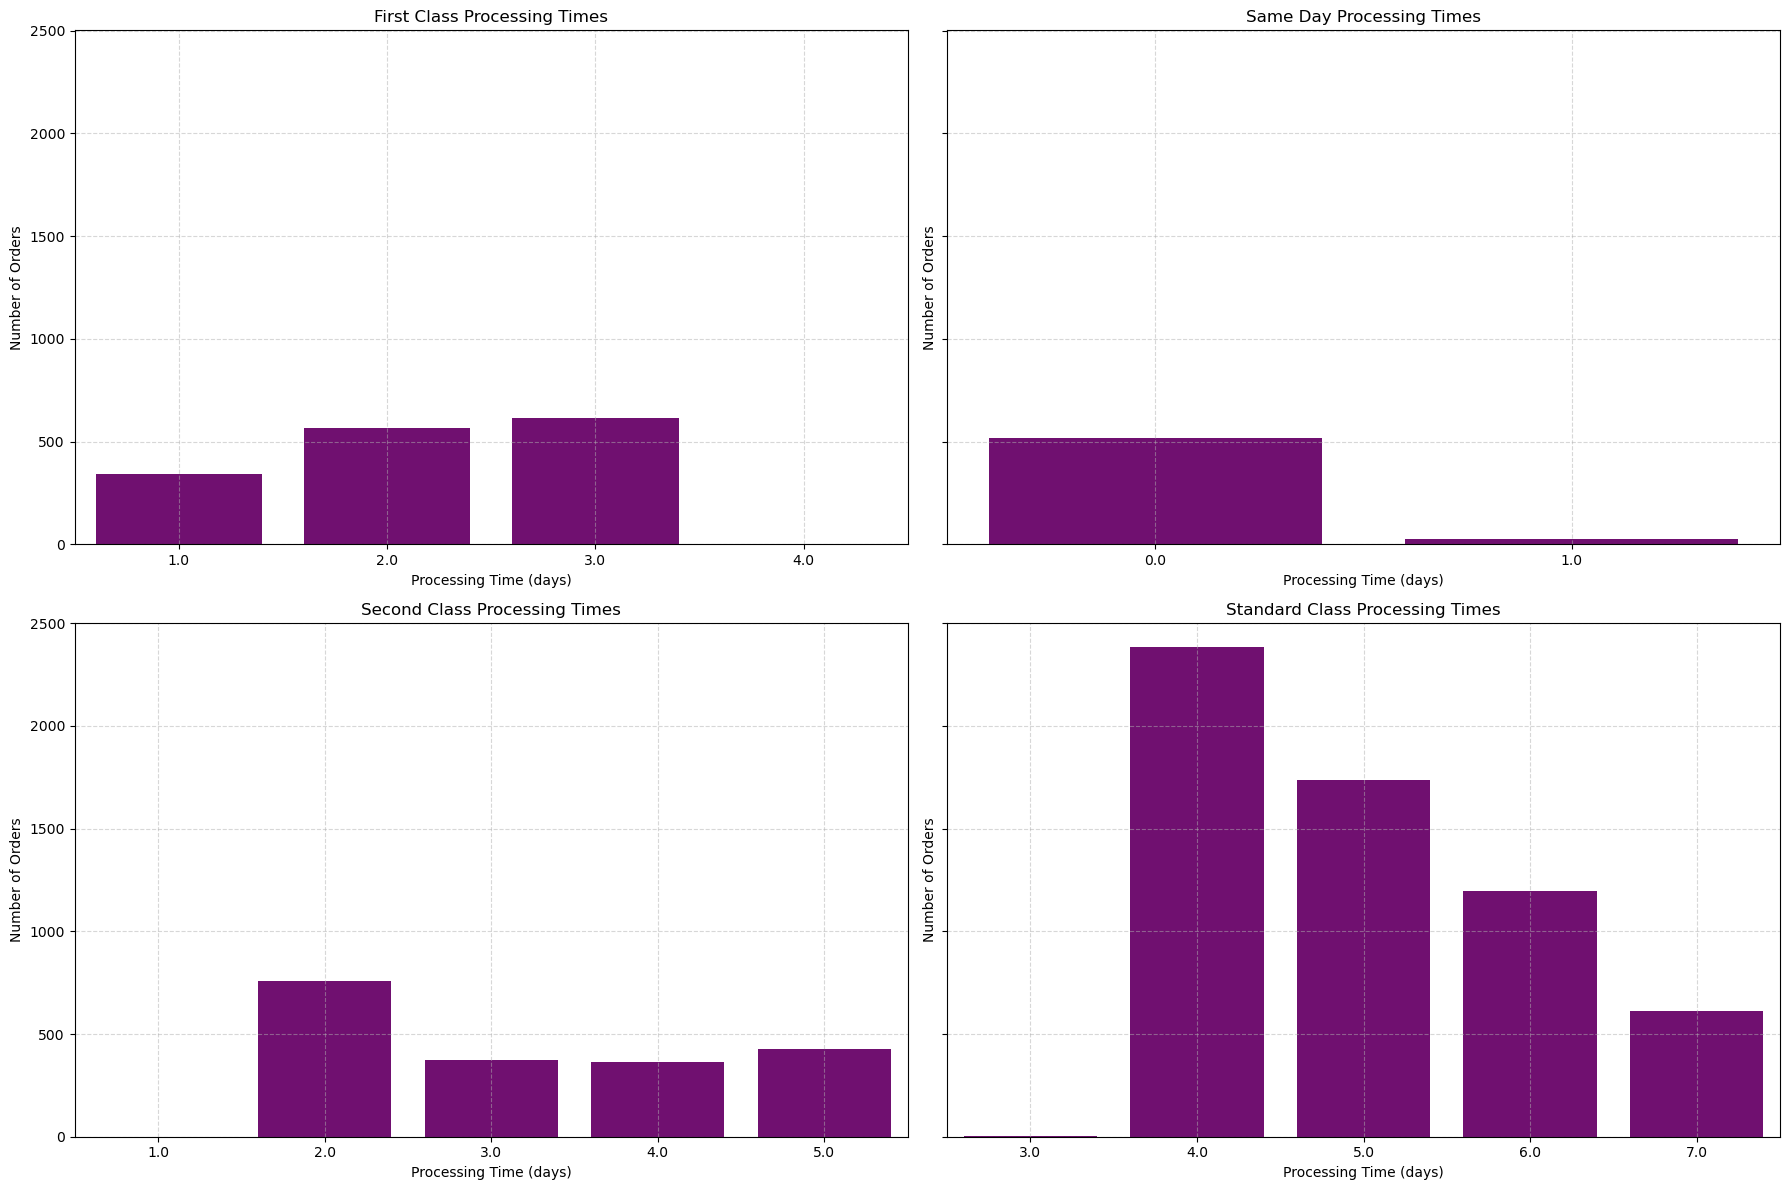

In [57]:
# Setting up the figure for multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()  # Flatten to easily iterate

# Plotting individual bar charts for each Ship Mode
ship_modes = processing_time_counts['ship_mode'].unique()
for i, mode in enumerate(ship_modes):
    subset = processing_time_counts[processing_time_counts['ship_mode'] == mode]
    sns.barplot(x='processing_time', y='Count', data=subset, ax=axes[i], color='purple')
    axes[i].set_title(f'{mode} Processing Times')
    axes[i].set_xlabel('Processing Time (days)')
    axes[i].set_ylabel('Number of Orders')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


In [58]:
# Calculate median processing times for each Ship Mode
median_processing_times_by_mode = df.groupby('ship_mode')['processing_time'].median()

# Display the median processing times for each Ship Mode
median_processing_times_by_mode


ship_mode
First Class       2.0
Same Day          0.0
Second Class      3.0
Standard Class    5.0
Name: processing_time, dtype: float64

Here are the median processing times specific to each Ship Mode:

- **First Class:** 2 days
- **Same Day:** 0 days
- **Second Class:** 3 days
- **Standard Class:** 5 days

These medians align more closely with the expected service levels of each shipping mode. Now, we will use these specific medians to update the missing `date_shipped` entries. This approach ensures that the estimated shipping dates are consistent with the shipping mode's typical processing time.


In [59]:
df['date_shipped'].isnull().sum()

16

In [60]:
# Identify rows with missing 'date_shipped' and update them using the median processing times specific to each 'ship_mode'
for mode, median_time in median_processing_times_by_mode.items():
    mode_mask = (df['ship_mode'] == mode) & (df['date_shipped'].isnull())
    df.loc[mode_mask, 'date_shipped'] = df.loc[mode_mask, 'date_ordered'] + pd.DateOffset(days=median_time)

# Recalculate 'processing_time' after updates
df['processing_time'] = (df['date_shipped'] - df['date_ordered']).dt.days

# Verify updates by checking for any remaining nulls in 'Date_Shipped'
remaining_nulls_after_update = df['date_shipped'].isnull().sum()
remaining_nulls_after_update


0

## Summary

To accurately fill missing `date_shipped` entries:

1. **Median Calculation:** We computed the median processing times separately for each shipping mode to reflect their specific service speeds.
2. **Date Estimation:** We filled the missing `date_shipped` values by adding the respective shipping mode’s median processing time to the `data_ordered` dates.
3. **Recalculation and Verification:** After updating, we recalculated the processing times and verified the integrity of the data to ensure all dates were correctly estimated according to each ship mode.

This targeted approach ensured the filled dates were realistic and consistent with each ship mode's typical processing duration.
